In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

%matplotlib inline

1. Загрузить файл auto.csv

In [2]:
df=pd.read_csv('auto.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

2. Рассчитать основные статистики для переменных(среднее,медиана, мода, мин/макс, сред. отклонение)

In [7]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.median()

symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10295.00
dtype: float64

In [23]:
df.mode().iloc[0]

symboling                 0
normalized-losses       161
make                 toyota
fuel-type               gas
aspiration              std
num-of-doors           four
body-style            sedan
drive-wheels            fwd
engine-location       front
wheel-base             94.5
length                157.3
width                  63.8
height                 50.8
curb-weight            2385
engine-type             ohc
num-of-cylinders       four
engine-size              92
fuel-system            mpfi
bore                   3.62
stroke                  3.4
compression-ratio         9
horsepower               68
peak-rpm               5500
city-mpg                 31
highway-mpg              25
price                  6785
Name: 0, dtype: object

3. Рассчитать и визуализировать корреляционную матрицу для переменных

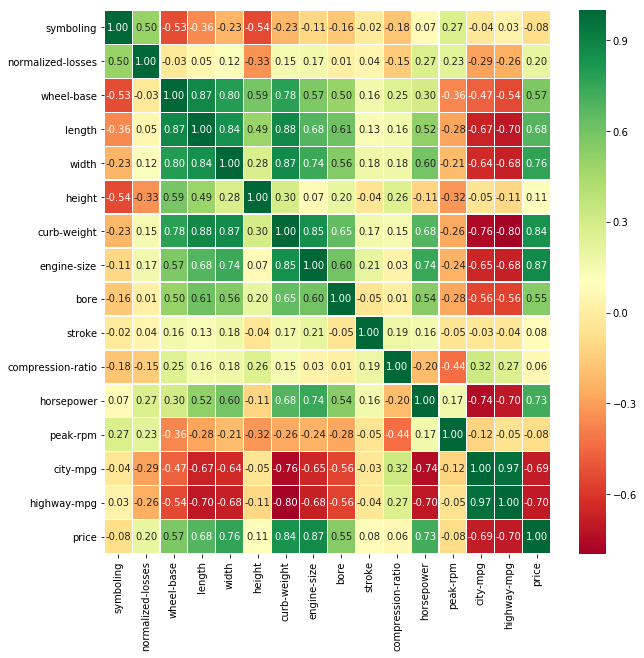

In [26]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='RdYlGn',linewidths=0.2)
plt.gcf().set_size_inches(10,10)

4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

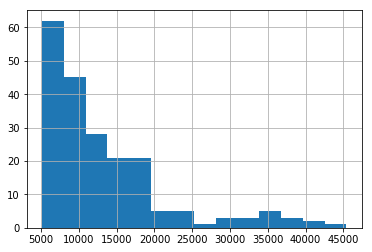

In [74]:
df['price'].hist(bins='auto')
plt.show()

In [31]:
print('kurtosis of price distribution: {}'.format(stats.kurtosis(df['price'])))
print('skewness of price distribution: {}'.format(stats.skew(df['price'])))

kurtosis of price distribution: 2.848082544390688
skewness of price distribution: 1.7534486514523662


5. Визуализировать несколько взаимосвязей между переменными

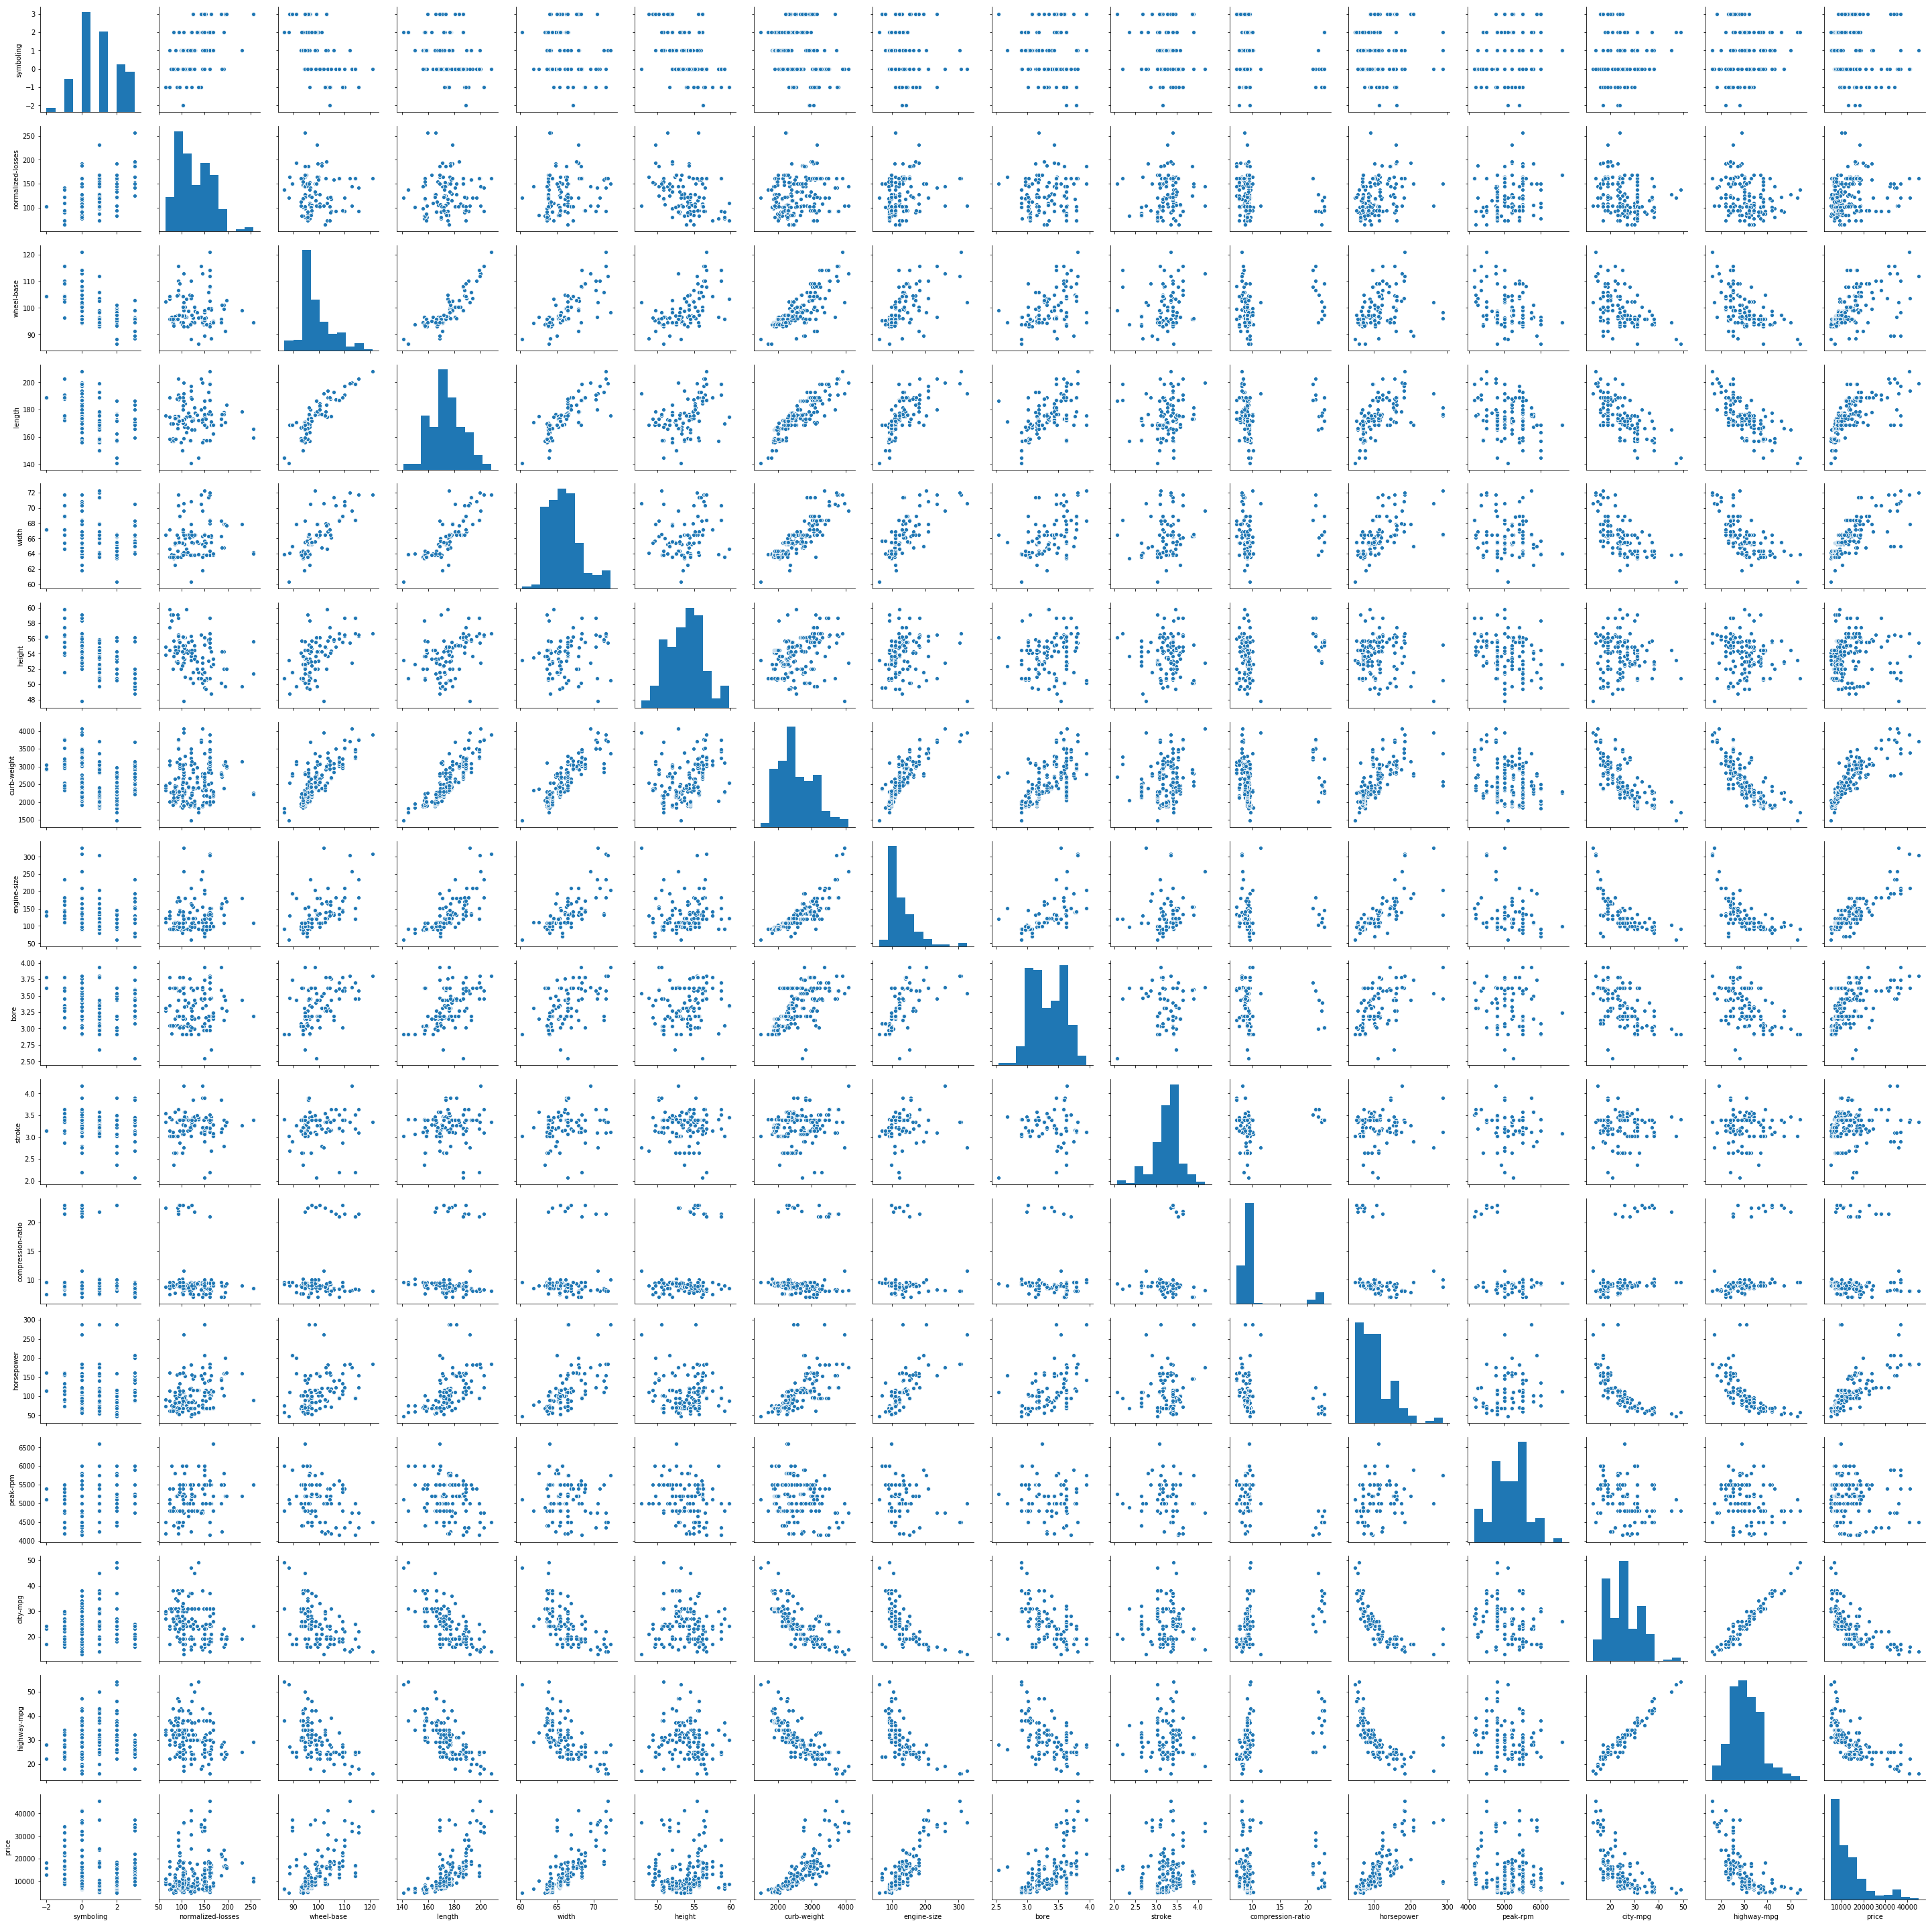

In [39]:
sns.pairplot(df)
plt.show()

6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

* Вероятно, более мощные автомобили будут стоить дороже.

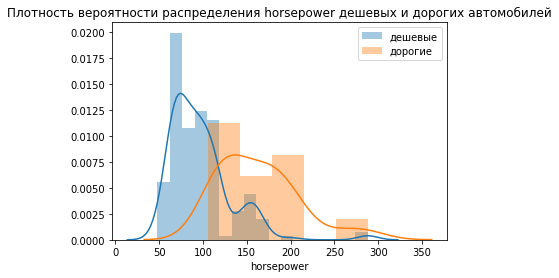

In [78]:
sns.distplot(df[df['price']<=20000]['horsepower'])
sns.distplot(df[df['price']>20000]['horsepower'])
plt.title('Плотность вероятности распределения horsepower дешевых и дорогих автомобилей')
plt.legend(['дешевые', 'дорогие'])
plt.show()

In [80]:
tst=stats.ttest_ind(df[df['price']<=20000]['horsepower'], df[df['price']>20000]['horsepower'])
print('t-statistics: {:.2f}'.format(tst[0]))
print('p-value: {:.15f}'.format(tst[1]))

t-statistics: -8.47
p-value: 0.000000000000005


p-value < 0.05, значит, утверждение верно.

* Вероятно, чем шире автомобиль, тем он и выше.

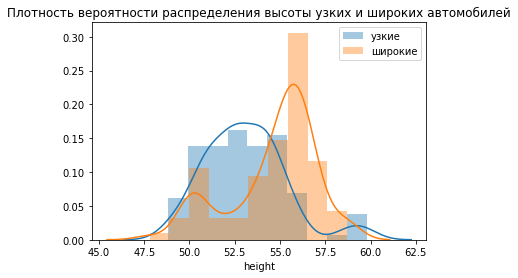

In [71]:
sns.distplot(df[df['width']<=df['width'].mean()]['height'])
sns.distplot(df[df['width']>df['width'].mean()]['height'])
plt.title('Плотность вероятности распределения высоты узких и широких автомобилей')
plt.legend(['узкие', 'широкие'])
plt.show()

In [72]:
tst=stats.ttest_ind(df[df['width']<=df['width'].mean()]['height'],df[df['width']>df['width'].mean()]['height'])
print('t-statistics: {:.2f}'.format(tst[0]))
print('p-value: {:.30f}'.format(tst[1]))

t-statistics: -4.78
p-value: 0.000003380527114521925995468824


p-value < 0.05, значит, утверждение верно.

* Вероятно, есть разница в цене между дизельными и бензиновыми двигателями.

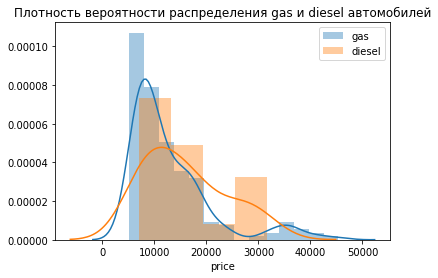

In [88]:
sns.distplot(df[df['fuel-type']=='gas']['price'])
sns.distplot(df[df['fuel-type']=='diesel']['price'])
plt.title('Плотность вероятности распределения цены для gas и diesel автомобилей')
plt.legend(['gas', 'diesel'])
plt.show()

In [89]:
tst=stats.ttest_ind(df[df['fuel-type']=='gas']['price'],df[df['fuel-type']=='diesel']['price'])
print('t-statistics: {:.2f}'.format(tst[0]))
print('p-value: {:.30f}'.format(tst[1]))

t-statistics: -1.47
p-value: 0.142702788374374611723993666601


p-value > 0.05, значит, утверждение не верно.